In [3]:
import pandas as pd
import seaborn as sns
from statannotations.Annotator import Annotator

In [4]:
def excel_to_pd(data_pd,data_pd_i,current_pd, cell_type, substance):

    for label, content in current_pd.items():
       
        if 'Control' in label:
            conc = 'Control'
        if '1 mg/ml' in label:
            conc = '1 mg/ml'
        if '0.1 mg/ml' in label:
            conc = '0.1 mg/ml'
        if '0.01 mg/ml' in label:
            conc = '0.01 mg/ml'

        data_pd_i['OD'] = content
        data_pd_i['Cell_type'] = cell_type
        data_pd_i['Substance'] = substance
        data_pd_i['Concentration'] = conc

        data_pd = pd.concat([data_pd,data_pd_i])
    return data_pd

In [10]:
sample_1_path = "C:\\Users\\Modern\\Desktop\\Python\\MTT assay multi\\Data\\TDA_2_10_4.xlsx"
sample_2_path = "C:\\Users\\Modern\\Desktop\\Python\\MTT assay multi\\Data\\TDA_2_11_1.xlsx"

sample_1_raw = pd.read_excel(sample_1_path)
sample_2_raw = pd.read_excel(sample_2_path)

print(sample_1_raw)


    1 mg/ml  0.1 mg/ml  0.01 mg/ml   Control  Unnamed: 4  Unnamed: 5  \
0   0.63336    0.83031     0.92937  1.064667         NaN         NaN   
1   0.62049    0.93093     0.86268  0.922667         NaN         NaN   
2   0.44499    0.85137     0.94224  0.868667         NaN         NaN   
3   0.78078    0.89115     0.90597  0.650667         NaN         NaN   
4   1.04169    0.75894     1.00074  0.977667         NaN         NaN   
5   0.75738    0.73788     0.90714  0.743667         NaN         NaN   
6   0.79014    0.64311     0.71760  0.610667         NaN         NaN   
7   0.57369    0.79872     1.02648  0.829667         NaN         NaN   
8   0.49062    0.86307     0.77025  1.188667         NaN         NaN   
9   0.57603    0.79404     0.72696  1.089667         NaN         NaN   
10  1.04286    0.82446     0.78312  0.796667         NaN         NaN   
11  1.05339    0.93561     0.78663  0.898667         NaN         NaN   
12  1.51554    1.04676     0.91416  0.740667         NaN        

In [12]:
labels = {'OD':[],'Cell_type':[],'Substance':[],'Concentration':[]}
data_pd = pd.DataFrame(labels)
data_pd_i = pd.DataFrame(labels)

data_pd = excel_to_pd(data_pd,data_pd_i,sample_1_raw,'Vero','TDA_2_10_4')
data_pd = excel_to_pd(data_pd,data_pd_i,sample_2_raw,'Vero','TDA_2_11_1')


print(data_pd)

         OD Cell_type   Substance Concentration
0   0.63336      Vero  TDA_2_10_4       1 mg/ml
1   0.62049      Vero  TDA_2_10_4       1 mg/ml
2   0.44499      Vero  TDA_2_10_4       1 mg/ml
3   0.78078      Vero  TDA_2_10_4       1 mg/ml
4   1.04169      Vero  TDA_2_10_4       1 mg/ml
..      ...       ...         ...           ...
16      NaN      Vero  TDA_2_11_1       Control
17      NaN      Vero  TDA_2_11_1       Control
18      NaN      Vero  TDA_2_11_1       Control
19      NaN      Vero  TDA_2_11_1       Control
20      NaN      Vero  TDA_2_11_1       Control

[504 rows x 4 columns]


In [14]:
data_ext = data_pd[(data_pd['Cell_type'] == 'Vero')].copy()

sns.barplot(data = data_ext, x = 'Substance', y = 'OD', hue = 'Concentration')

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [8]:
data_ext = data_pd[(data_pd['Cell_type'] == 'Vero')].copy()
substances_list = ['TDA_2_10_4','TDA_2_11_1']

labels = {'OD':[],'Relative':[],'Substance':[],'Concentration':[]}
data = pd.DataFrame(labels)

for substance in substances_list:
    data_i = data_ext[(data_ext['Substance'] == substance)]
    control_mean = data_i.loc[data_i['Concentration']=='Control', 'OD'].mean()
    data_i['Relative'] = data_i['OD']/control_mean*100
    data = pd.concat([data,data_i])
  
print(data)

TypeError: unsupported operand type(s) for +: 'float' and 'str'

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TDA_2_11_1_0.01 mg/ml vs. TDA_2_11_1_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:9.096e-01 U_stat=2.780e+02
TDA_2_10_4_0.01 mg/ml vs. TDA_2_10_4_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=2.420e+02
TDA_2_10_4_0.1 mg/ml vs. TDA_2_10_4_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=2.140e+02
TDA_2_11_1_0.1 mg/ml vs. TDA_2_11_1_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=2.720e+02
TDA_2_10_4_1 mg/ml vs. TDA_2_10_4_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=1.840e+02
TDA_2_11_1_1 mg/ml vs. TDA_2_11_1_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correcti

(<AxesSubplot: xlabel='Substance', ylabel='Viable cell, % of control'>,
  <statannotations.Annotation.Annotation at 0x21a912975b0>])

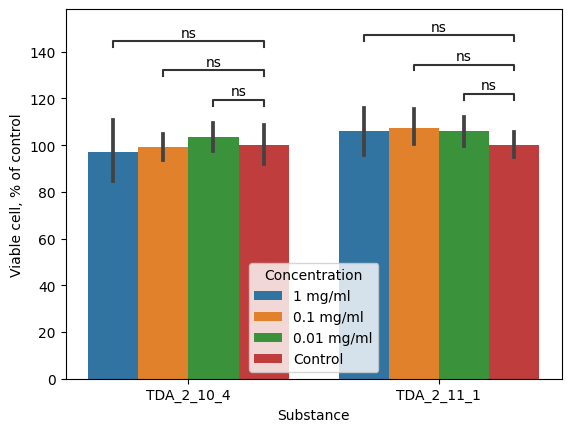

In [33]:
ax = sns.barplot(data = data, x = 'Substance', y = 'Relative', hue = 'Concentration')
ax.set(xlabel='Substance', ylabel='Viable cell, % of control')

pairs=[(('TDA_2_10_4','Control'),('TDA_2_10_4','1 mg/ml')),(('TDA_2_10_4','Control'),('TDA_2_10_4','0.1 mg/ml')),(('TDA_2_10_4','Control'),('TDA_2_10_4','0.01 mg/ml')),
       (('TDA_2_11_1','Control'),('TDA_2_11_1','1 mg/ml')),(('TDA_2_11_1','Control'),('TDA_2_11_1','0.1 mg/ml')),(('TDA_2_11_1','Control'),('TDA_2_11_1','0.01 mg/ml'))]

annotator = Annotator(ax, pairs, data=data, x = 'Substance', y = 'Relative', hue = 'Concentration')
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', comparisons_correction="Bonferroni")
annotator.apply_and_annotate()

